# Fakultät für Physik

## Physikalisches Praktikum P2 für Studierende der Physik

Versuch P2-63, 64, 65 (Stand: April 2024)

[Raum F1-08](https://labs.physik.kit.edu/img/Praktikum/Lageplan_P2.png)



# Photoeffekt

Name: Stier Vorname: Jonah E-Mail: uifed@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Name: Mutter Vorname: Raphael E-Mail: unodw@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: Mo31

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: Denis Benatre

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}



Versuch durchgeführt am: 03.06.2024

---

**Beanstandungen:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

# Durchführung

**Die Anleitung zu diesem Versuch finden Sie [hier](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Photoeffekt/README.md).**

In [1]:
import numpy as np
import scipy.constants as const
import matplotlib.pyplot as plt
import kafe2
from scipy.stats import norm
import pandas as pd
import uncertainties.unumpy as unp
from uncertainties import ufloat

## Aufgabe 1: Grundlagen

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Photoeffekt/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Machen Sie sich mit dem zu untersuchenden Effekt und der Art, wie Sie ihn beobachten und messen werden vertraut. 
 * Bearbeiten Sie hierzu die folgenden Aufgaben.

### Aufgabe 1.1: Qualitative Beobachtung des äußeren photoelektrischen Effekts

Beobachten Sie den äußeren Photoeffekt mit Hilfe des bereitstehenden statischen Elektrometers (E), der $\mathrm{Zn}$-Platte (Zn) und der $\mathrm{Hg}$-Dampflampe (Hg) qualitativ. Gehen Sie dabei wie folgt vor: 

 * Laden Sie Zn negativ auf und beobachten, Sie E ohne Zn mit Hg zu bestrahlen. 
 * Laden Sie Zn negativ auf und beobachten, Sie E, wenn Sie Zn mit Hg bestrahlen.
 * Laden Sie Zn negativ auf und beobachten, Sie E, wenn Sie Zn mit Hg bestrahlen und zusätzlich eine positiv geladene Elektrode in die Nähe von Zn bringen.
 * Laden Sie Zn positiv auf und beobachten, Sie E, wenn Sie Zn mit Hg bestrahlen.

Beschreiben und erklären Sie Ihre Beobachtungen. 

---

The experimental setup consists of an electroscope with a connected zinc plate. The oxide layer on the plate is first removed with sandpaper. The plate is then charged with $\sim\pm 2\,kV$. If the plate is initially charged positively, it discharges slowly. Because of the electric field of the platte the kinetic energy of the electrons is not enough to escape and because they are charged negatively anyways the Plate doesn't  discharge. It only discharges because of influences of the air and the insulator. If the plate is charged negatively and not exposed to the light it only discharges slowly because the influence of the ambient light is negligible. So it only discharges by air ant the insulator again. If the plate is exposed to the light electrons get nocked out because of the photoelectric effect. The plate discharges notably faster than before. If  a negatively charged electrode is held near the plate it discharges even faster because the electrode forms an attractive path for the electrons. 

### Aufgabe 1.2: Charakterisierung des für die folgenden Aufgaben zu verwendenden Elektrometers

 * Nehmen Sie einen Nullabgleich des für **Aufgabe 2** zu verwendenden Elektrometers vor. 
 * Bestimmen Sie den Innenwiderstand $R_{i}$ des Elektrometers mit Hilfe der vorhandenen Vorwiderstände von $R_{V}=0.1,\, 1$ und $10\,\mathrm{G\Omega}$. 

---

For the Zero adjustment the inputs of the measuring amplifier where shorted and then the output voltage was adjusted using two knobs so it was approximately zero $(0.006\,V)$ at an amplification of $v_U=100$. We did this so the Amplifier was returning true values for the following experiments.  

Then the internal resistance of the amplifier was determined. Assuming $U_0\left(1-\frac{R_{\rm{v}}}{R_{\rm{i}}}\right)$ as model for the fit as stated in the preparation. We assume an error of $10\,\%$ on the resistors and $\Delta U_0=0.01\,V$ on the reference voltage. Because the measurement fluctuated considerably we assume an error of $0.05\,V$ on the measured voltage. 

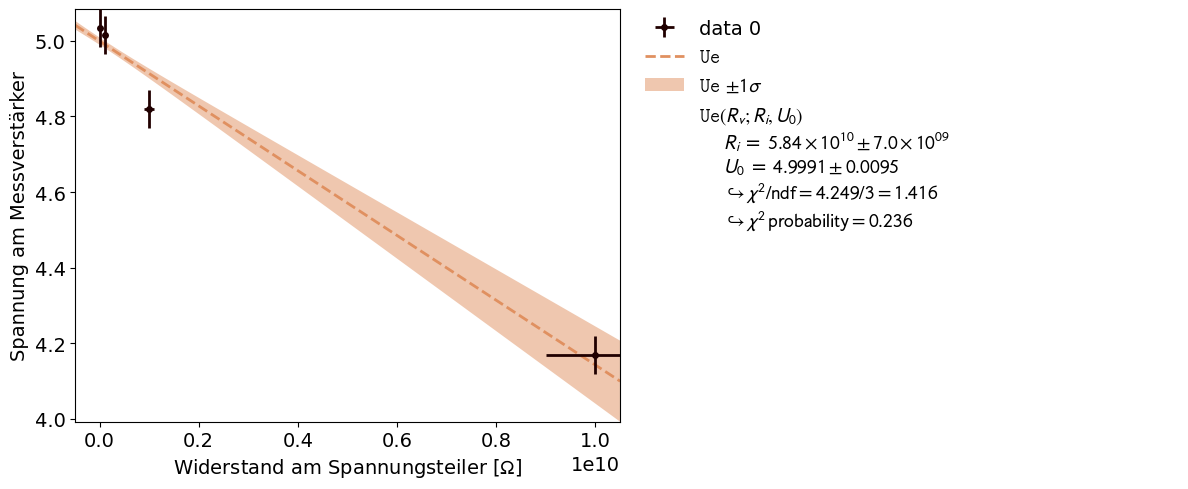

In [12]:
Rs = np.array([[10,5.034],[100,5.016],[1000,4.820],[10000,4.170]]) #[MOhm,Volt]
Rs[:,0] *= 1e6

def Ue(R_v,R_i=1e10,U_0=5):
    return U_0*(1-R_v/R_i)


resist = kafe2.XYContainer(Rs[:,0],Rs[:,1])
resist.add_error('x',0.1,relative=True)
resist.add_error('y',0.05)
resist_fit = kafe2.Fit(resist,Ue)

resist_fit.add_parameter_constraint("U_0",5,0.01)

resist_fit.do_fit()
resist_plot = kafe2.Plot(resist_fit)
resist_plot.y_label = 'Spannung am Messverstärker'
resist_plot.x_label = 'Widerstand am Spannungsteiler [$\Omega$]'
resist_plot.plot()
plt.show()
Ri = ufloat(resist_fit.parameter_values[0],resist_fit.parameter_errors[0])



The measuring amplifier is rated at $R_{\rm{ionternal}}\geq 10^{13}\,\Omega$ in electrometer mode. The fit yields $R_i=5.84\pm0.70\cdot 10^10$ which is orders of magnitude lower than the rating. Nonetheless the determined resistance is sill very high and will likely not have a big influence on the results in the following experiments. The fit itself is not very good the measured value of the $1\,G\Omega$ doesn't seem to fit, though the $\frac{\chi^2}{ndf}=1.416$ and the $\chi^2$ probability are still in acceptable range. It still gives a feeling for the internal resistance and because its only relevant that it is high, the precise value is not needed anyways. 

## Aufgabe 2: Bestimmung von $h$

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Photoeffekt/doc/Hinweise-Versuchsdurchfuehrung.md).**

 - Bestimmen Sie $h$ aus dem äußeren photoelektrischen Effekt mit Hilfe von zwei verschiedenen Schaltungen. 
 - Bearbeiten Sie hierzu die folgenden Aufgaben.

### Aufgabe 2.1: Spannung $U_{\mathrm{Ph}}$ der Photozelle bei variierender Lichtfrequenz

 * Tragen Sie die sich von selbst einstellende maximale Spannung $U_{\mathrm{Ph}}$ der Photozelle bei Bestrahlung mit Licht der Wellenlängen $\lambda_{\mathrm{CWL}}^{(i)}$ bei maximaler Lichtintensivität auf. 
 * Verwenden Sie die folgenden sechs Wellenlängen der zur Verfügung stehenden Filter: $\lambda_{\mathrm{CWL}}^{(i)} = 360,\,400,\,440,\,490,\,540,\,590\,\mathrm{nm}$.
 * Bestimmen Sie $h$ durch Anpassung eines geeigneten Modells.

---

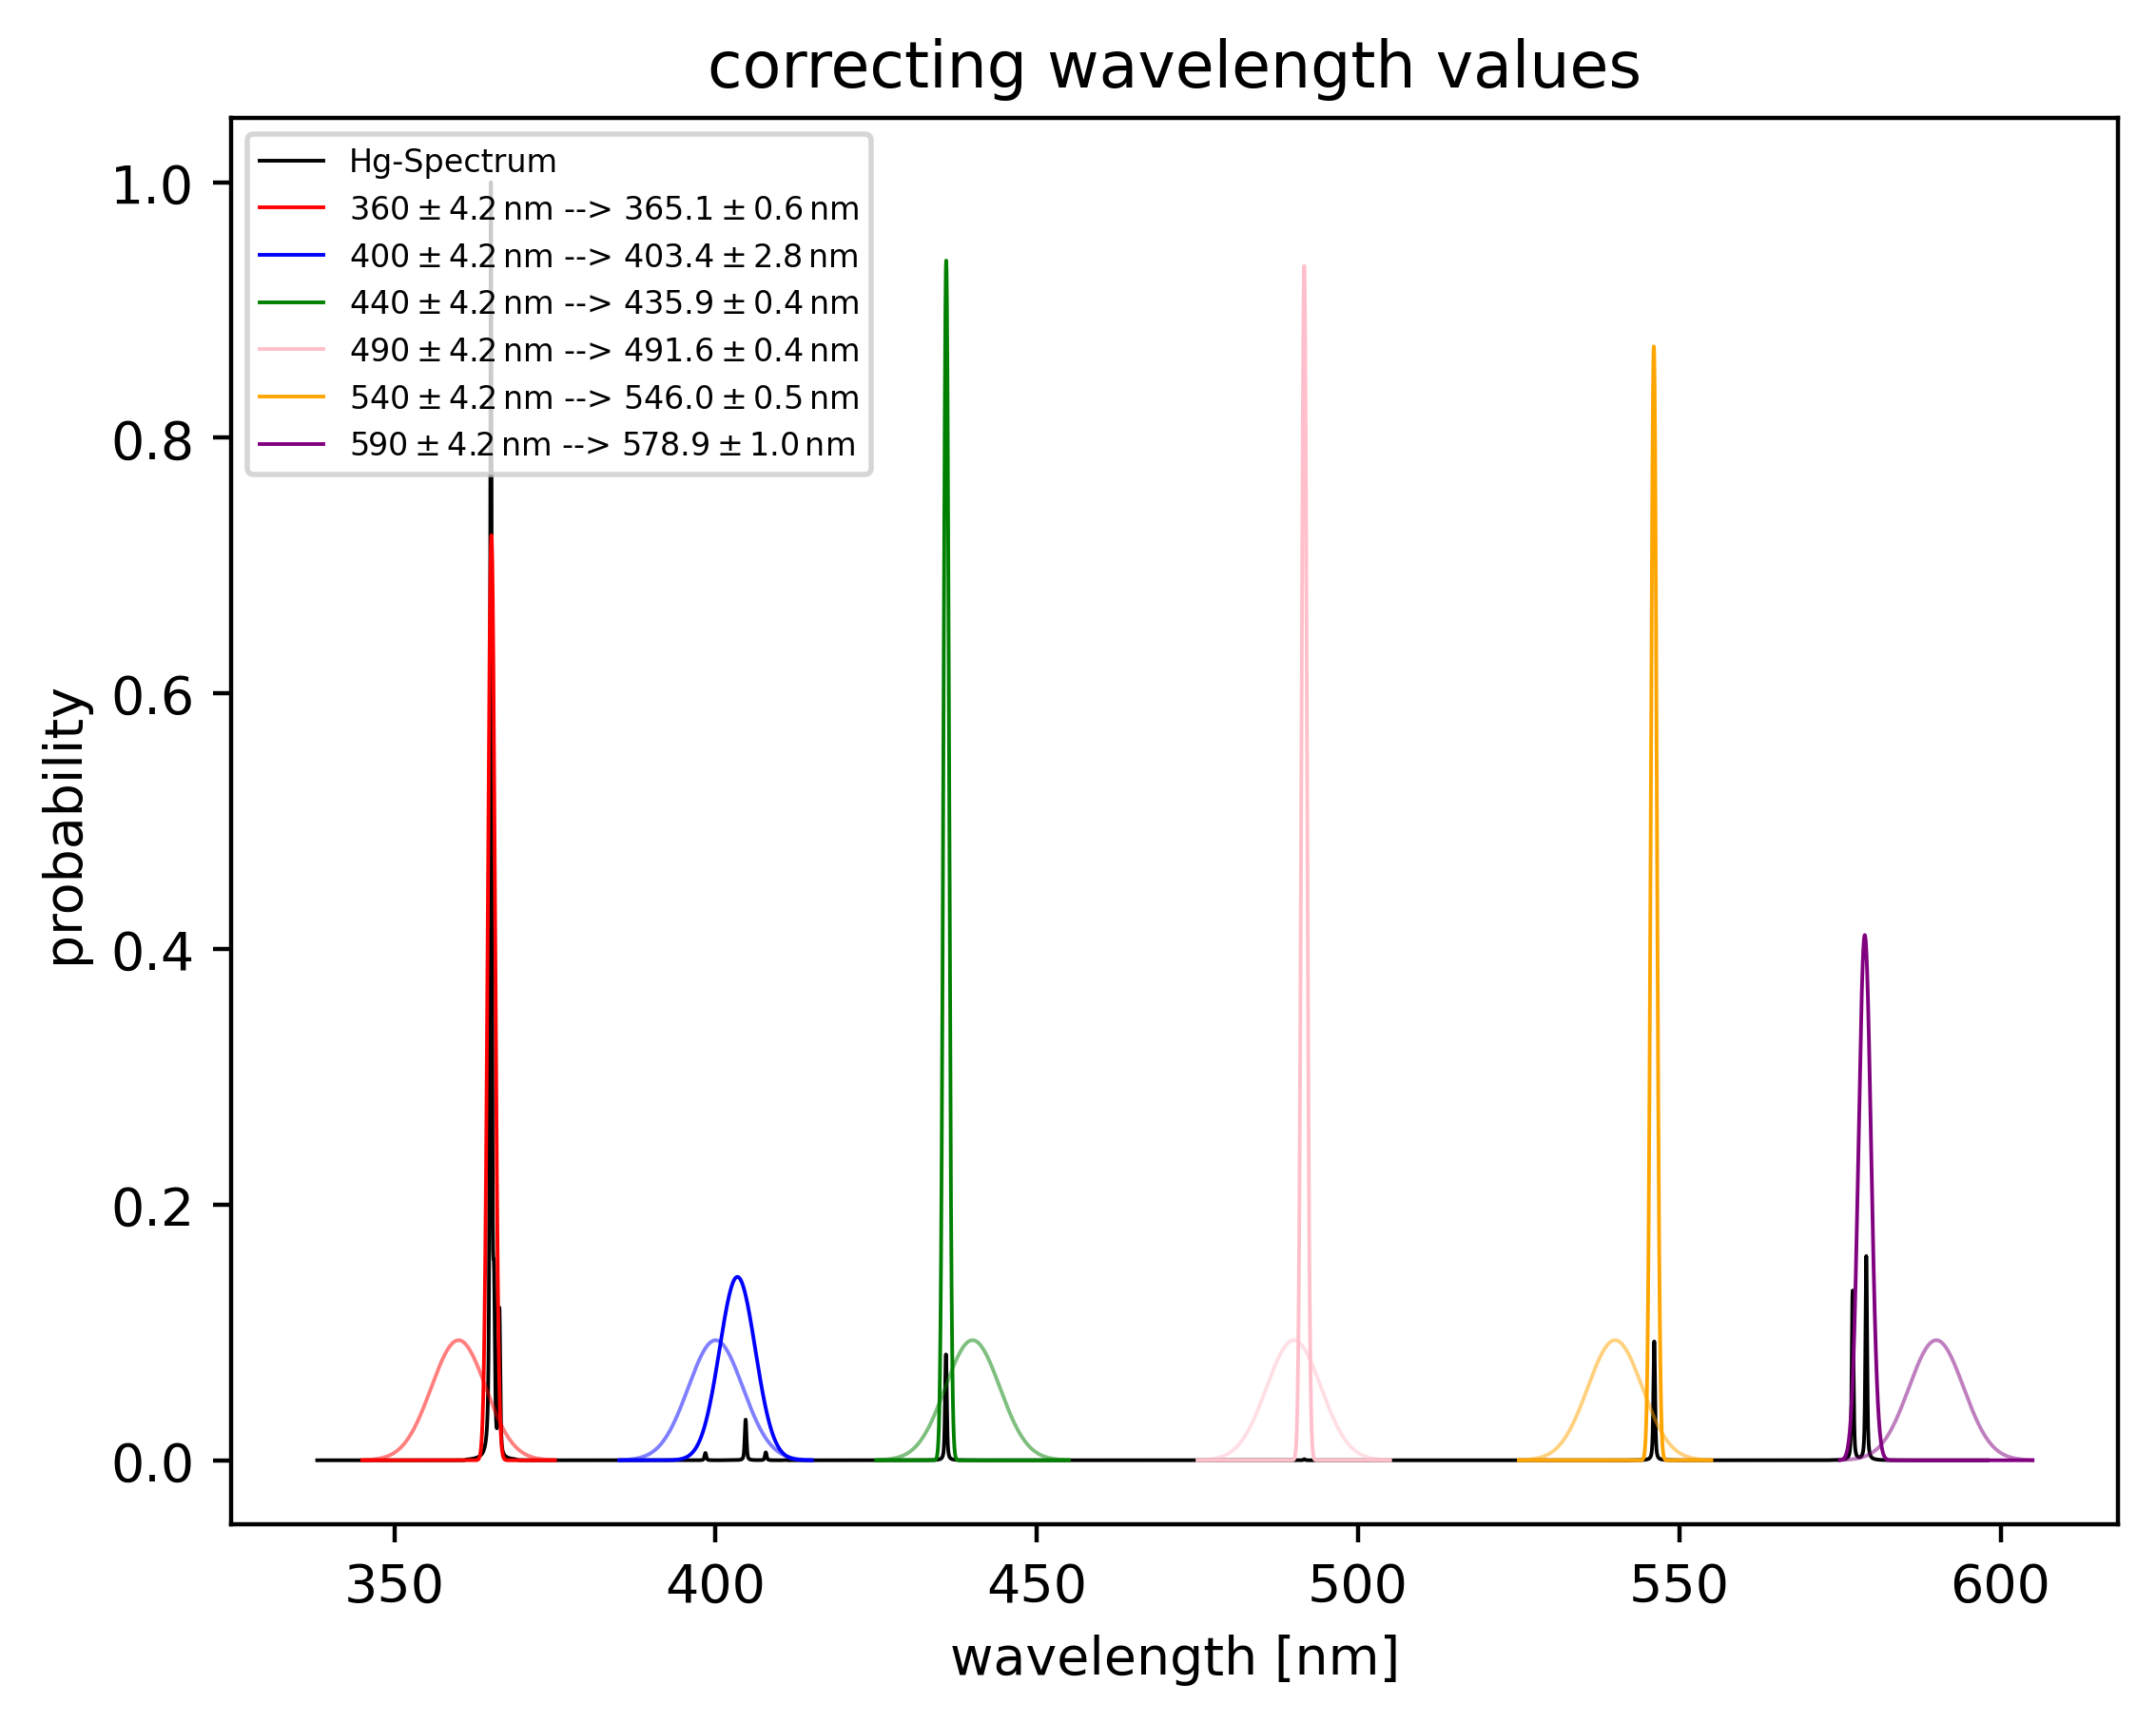

In [ ]:
data = pd.read_csv('Hg.csv')
data['intens'].apply(lambda x: float(x))
data['welle'].apply(lambda x: float(x))
data['welle'] += [0,0.02,0.04,0.06,0.08]*7040+[0,0.02,0.04]

plt.plot(data['welle'].iloc[7000:20000],data['intens'].iloc[7000:20000],color='black',lw=0.7,label='Hg-Spectrum')

wavesn = []
wavess = []
wavelengths = [360,400,440,490,540,590]

for pos,col in zip(wavelengths,['red','blue','green','pink','orange','purple']):

    def gauss(x,mu=pos,sigma=10/2.3548):
        return 1/sigma/np.sqrt(2*np.pi)*np.exp(-1/2*(x-mu)**2/sigma**2)

    intensity = data['intens'][abs(data['welle']-pos) < 15]
    wave = data['welle'][abs(data['welle']-pos) < 15]
    new = intensity*wave.apply(gauss)
        
    mean = np.average(wave,weights=new)
    variance = np.average((wave - mean)**2, weights=new)
    std_dev_value = np.sqrt(variance)
    plt.plot(wave,gauss(wave),color=col,alpha=0.5,lw=0.7)
    plt.plot(wave,gauss(wave,mu=mean,sigma=std_dev_value),color=col,lw=0.7,label=fr'${pos}\pm{round(10/2.3548,1)}\,$nm --> $ {round(mean,1)}\pm{round(std_dev_value,1)}\,$nm')
    plt.legend(prop={'size': 6})
    plt.gcf().set_dpi(400)
        
    wavesn.append(mean)
    wavess.append(std_dev_value)
waves = unp.uarray(wavesn,wavess)/1e9
    
plt.title('correcting wavelength values')
plt.ylabel('probability')
plt.xlabel('wavelength [nm]')
plt.show()

In order to find the wavelength of light let throw by the filters, it is necessary to to overlay and multiply Hg-spectrum with the respective filters. For this we used sepctral data from the internet (https://www.atomtrace.com/elements-database/element/80).

Each color in the Graph satans for a certain filter (partly transparent), and the actual wavelengths let throw by combining its probability distribution with the spectral data (full-color). This results in new values (shown in legend) as well as uncertainties which will be used in the following exercices.

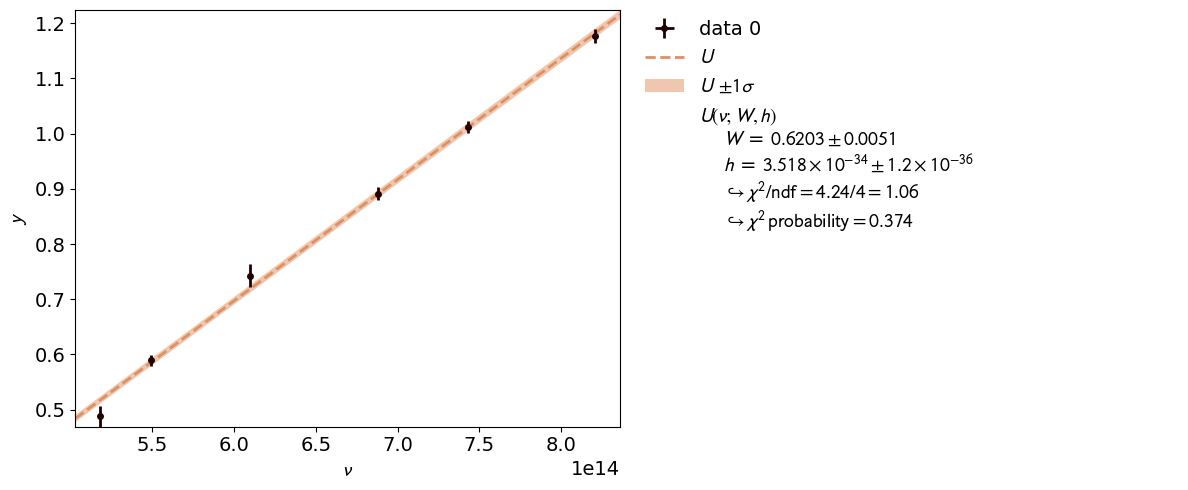

In [ ]:
freqs = const.c/waves
Uph = np.array([[1.193,1.172,1.172,1.173,1.175],[1.023,1.009,1.010,1.010,1.010],[0.905,0.887,0.887,0.888,0.889],[0.773,0.735,0.735,0.735,0.736],[0.599,0.586,0.587,0.587,0.587],[0.515,0.483,0.480,0.480,0.480]]) #[nm,V]
Uphn = np.mean(Uph,axis=1)
Uphs = np.std(Uph,axis=1)

def U(nu,W,h):
    return h*nu/const.e - W

err_syst= 0.005 #error when reading the multimeter

kafe2.xy_fit(U,unp.nominal_values(freqs),Uphn,y_error=Uphs+err_syst)
kafe2.plot()

The fit gives us a resulft for plancks konstant of:

$$
h = 3.52 \pm 0.12*10^{34}\,\mathrm{Js}
$$

This result is far of the literature-values by almost a factor of 2:

$$
h_{Lit} = 6.55*10^{34}\,\mathrm{Js}
$$

This error is present in all the following determinations of $h$. It is thus likely, that the difference comes from a error in the equipment (old tech).

### Aufgabe 2.2: Photostrom $I_{\mathrm{Ph}}$ als Funktion einer angelegten externen Spannung $U_{o}$ bei variierender Lichtintensität

 - Tragen Sie für $\lambda_{\mathrm{CWL}}=400\,\mathrm{nm}$ den Photostrom $I_{\mathrm{Ph}}$ als Funktion einer angelegten externen Spannung $U_{o}$ auf.
 - Bestimmen Sie durch Anpassung eines geeigneten Modells den Wert von $U(I_{\mathrm{Ph}}=0)$ im Nahbereich des Nulldurchgangs. 
 - Folgen Sie den vorgenannten Punkten einmal für die maximale und einmal für eine bei mittels eines Graufilters reduzierte Lichtintensität. 
 - Bestimmen Sie die Abnahme der Lichtintensität durch den Filter.

---

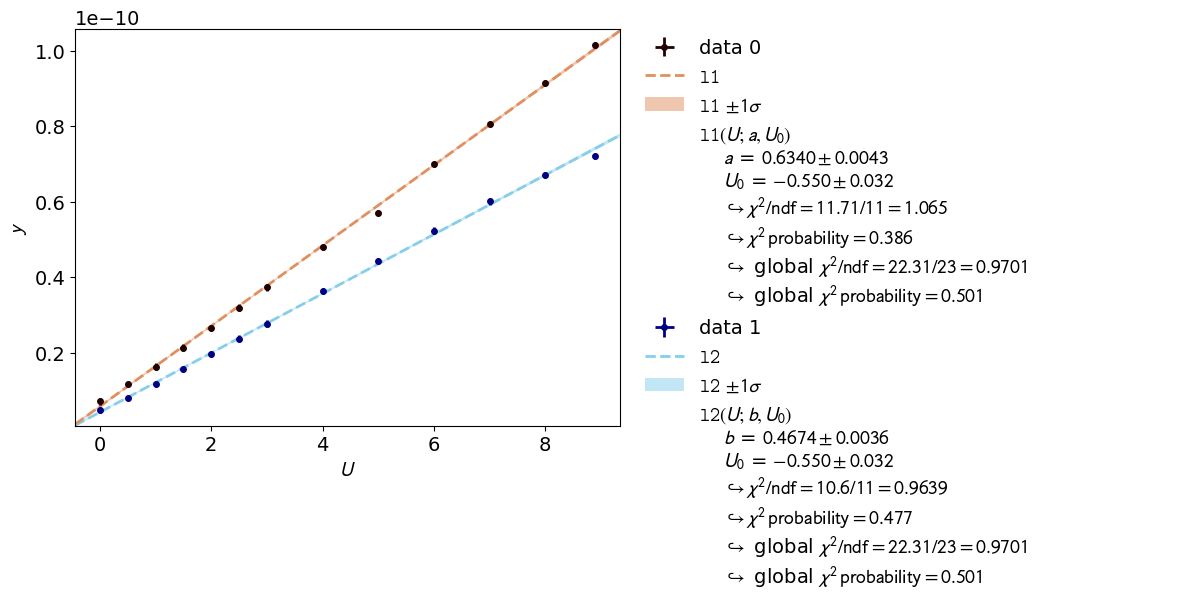

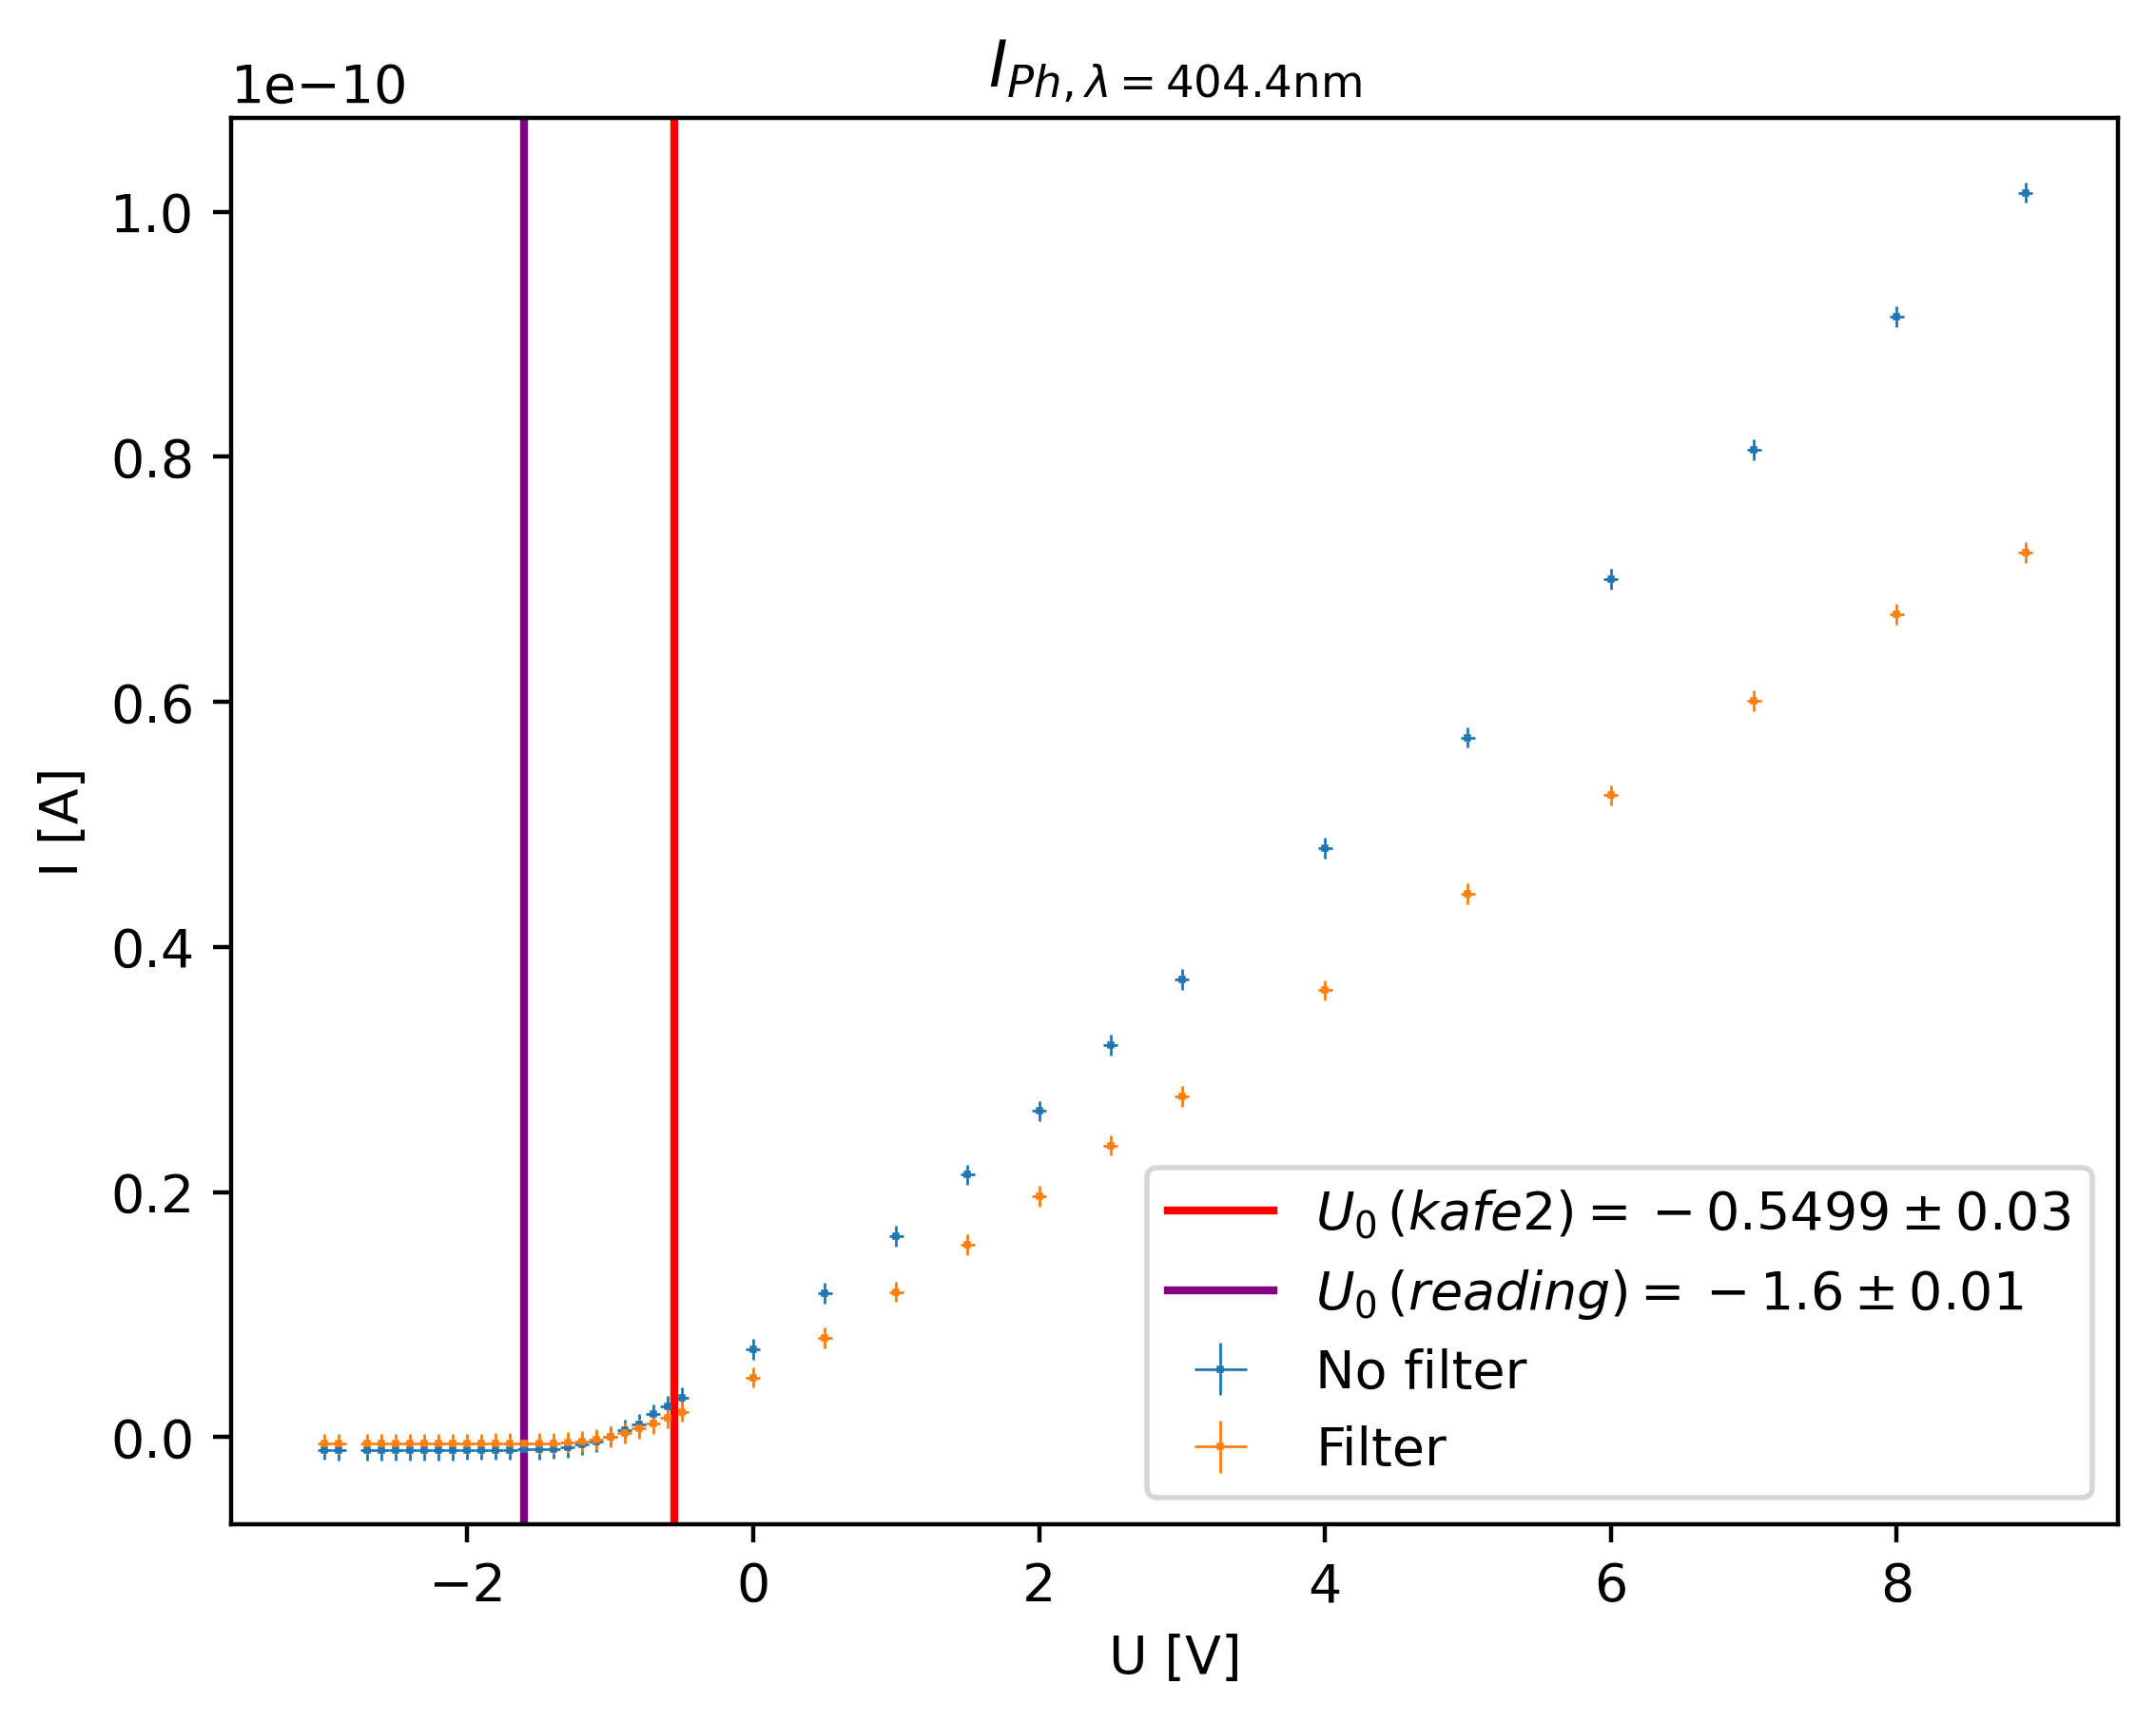

In [ ]:
data1 = np.array([[-0.062,-3.00],[-0.063,-2.90],[-0.063,-2.70],[-0.063,-2.60],[-0.063,-2.5],[-0.063,-2.4],[-0.063,-2.3],[-0.063,-2.2],[-0.063,-2.1],[-0.062,-2.0],[-0.062,-1.9],[-0.062,-1.8],[-0.062,-1.7],[-0.061,-1.6],[-0.059,-1.5],[-0.057,-1.4],[-0.050,-1.3],[-0.038,-1.2],[-0.021,-1.1],[0.003,-1.0],[0.034,-0.9],[0.062,-0.8],[0.110,-0.7],[0.149,-0.6],[0.190,-0.5],[0.427,0],[0.700,0.5],[0.977,1],[1.275,1.5],[1.585,2.0],[1.906,2.5],[2.225,3.0],[2.864,4.0],[3.401,5.0],[4.170,6.0],[4.800,7.0],[5.447,8.0],[6.050,8.9]])

data2 = np.array([-0.033]*11+[-0.032]*3+[-0.031,-0.030,-0.028,-0.021,-0.012,0.002,0.019,0.041,0.067,0.094,0.123,0.290,0.481,0.706,0.935,1.170,1.418,1.655,2.172,2.640,3.120,3.580,4.000,4.300])

data1[:,0] /= Ri.n
data2 /= Ri.n

uerr = 0.05/Ri.n



def l1(U,a,U_0):
    return a*(U-U_0)/Ri.n

def l2(U,b,U_0):
    return b*(U-U_0)/Ri.n


cont1 = kafe2.XYContainer(data1[25:,1],data1[25:,0])
cont2 = kafe2.XYContainer(data1[25:,1],data2[25:])
fit1 = kafe2.Fit(cont1,l1)
fit1.add_error('y',uerr)
fit2 = kafe2.Fit(cont2,l2)
fit2.add_error('y',uerr)
multi = kafe2.MultiFit([fit1,fit2])
multi.do_fit()
multiplot = kafe2.Plot(multi)
multiplot.plot()
multiplot.y_label = 'Stromstärke'
multiplot.show()



plt.errorbar(data1[:,1],data1[:,0],0.05/Ri.n,0.05,fmt='s',markersize=0.5,lw = 0.5,label='No filter')
plt.errorbar(data1[:,1],data2,0.05/Ri.n,0.05,fmt='s',markersize=0.5,lw = 0.5,label ='Filter')
plt.axvline(multi.parameter_values[1],label=fr'$U_0\,(kafe2)= {multi.parameter_values[1]:.4}\pm{multi.parameter_errors[1]:.1}$'.format(),color='red')
plt.axvline(data1[13,1],label=fr'$U_0\,(reading)= {data1[13,1]:.4}\pm{0.01:.1}$'.format(),color='purple')
plt.legend()
plt.title(r'$I_{Ph,\lambda = 404.4 \mathrm{nm}}$')
plt.ylabel('I [A]')
plt.xlabel('U [V]')
plt.gcf().set_dpi(400)
plt.show()

#const.e*ufloat(multi.parameter_values[1],multi.parameter_errors[1])/freqs[1]
#const.e*ufloat(data1[13,1],0.05)/freqs[1]

In order to fin the Voltage at which the first instances of the Current can be detected, we used the measurement values for $U > 0$, since a linearity can be found there. Using this approch with kafe2, we could find the minimum Voltage required to measure the photoelectric effect to be $U_0 = -0.5499 \pm 0.006 V$.

When calculating plancks konstante $h$ from these Values:

$$
h = \frac{e\,U}{\nu} = 1.19 \pm 0.02\,\mathrm{Js}
$$

We notice a heavy deviation from our previous results.

If alternatively, we would take a look at the full dataset and find the first instances, at which the voltage starts rising, without taking a look at the latter values, we find that:

$$
h = \frac{1.6\,eV}{\nu} = 3.45 \pm 0.11\,\mathrm{Js}
$$

Which resembels the previuos results more closely. Thus it proves that using the fitting appoach with kafe2 wasn't the best approach to this problem.


### Aufgabe 2.3: Spannung $U_{o}(I_{\mathrm{Ph}}=0)$ bei variierender Lichtfrequenz

 * Bestimmen Sie für die in **Aufgabe 2.1** verwendeten Wellenlängen $\lambda^{(i)}_{\mathrm{CWL}}$ jeweils die Spannung $U^{(i)}(I_{\mathrm{}Ph}=0)$. 
 * Bestimmen Sie $h$ durch Anpassung eines geeigneten Modells und vergleichen Sie mit dem Ergebnis aus **Aufgabe 2.1**.
 
---

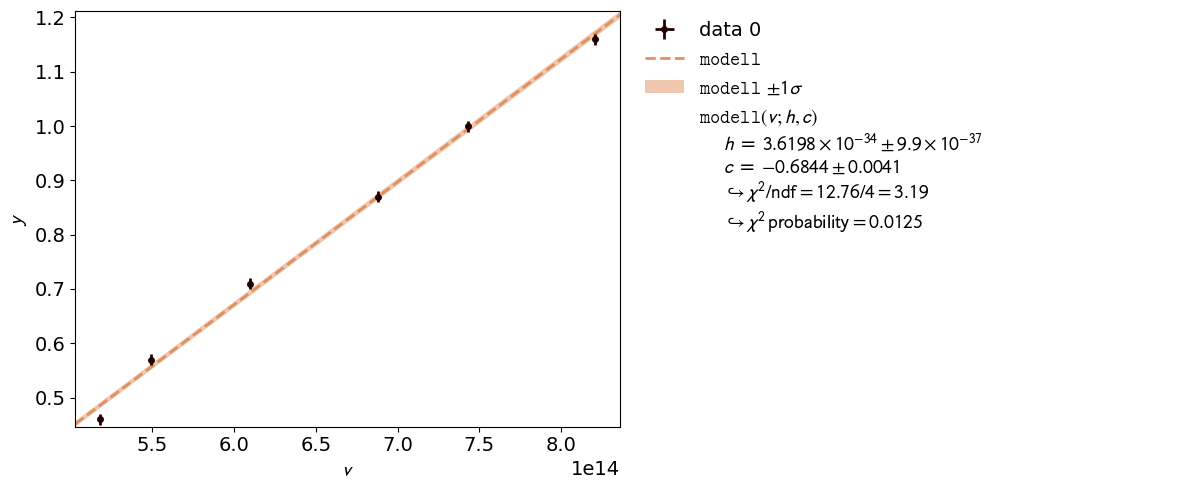

In [ ]:
lam = np.array([1.16,1.00,0.87,0.71,0.57,0.46])

def modell(v,h,c):
    return h*v/const.e+c

kafe2.xy_fit(modell,unp.nominal_values(freqs),lam,y_error=0.01)
kafe2.plot()

We get a value of:

$$
h = 3.62 \pm 0.99 * 10^{34}\,\mathrm{Js}
$$

which is in range of the previous determined value, but once again of by a factor of almost 2 compared to the literature value.